<a href="https://colab.research.google.com/github/xanasa14/MLImplementations/blob/master/StrokePredicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import random
%matplotlib inline

In [24]:
#importing our cancer dataset
dataset = pd.read_csv('/content/drive/MyDrive/StrokeDataset/healthcare-dataset-stroke-data.csv')
col_list = ['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']
dataset.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


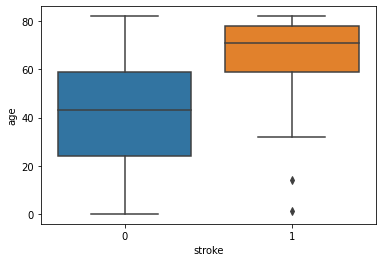

In [25]:
sns.boxplot(x='stroke', y='age', data=dataset)


In [30]:
#Taking care of BMI's NAN values 
dataset = dataset.fillna(dataset.mean())

In [29]:
X = dataset[col_list]
Y = dataset['stroke']
print(X)

      gender   age  hypertension  ...  avg_glucose_level        bmi   smoking_status
0       Male  67.0             0  ...             228.69  36.600000  formerly smoked
1     Female  61.0             0  ...             202.21  28.893237     never smoked
2       Male  80.0             0  ...             105.92  32.500000     never smoked
3     Female  49.0             0  ...             171.23  34.400000           smokes
4     Female  79.0             1  ...             174.12  24.000000     never smoked
...      ...   ...           ...  ...                ...        ...              ...
5105  Female  80.0             1  ...              83.75  28.893237     never smoked
5106  Female  81.0             0  ...             125.20  40.000000     never smoked
5107  Female  35.0             0  ...              82.99  30.600000     never smoked
5108    Male  51.0             0  ...             166.29  25.600000  formerly smoked
5109  Female  44.0             0  ...              85.28  26.2000

In [46]:
from sklearn.preprocessing import LabelEncoder

print (dataset['smoking_status'].unique())

# creating instance of labelencoder
labelencoder = LabelEncoder()
# creating initial dataframe
#smoking_statuses = ('formerly smoked','never smoked','smokes','Unknown')
#bridge_df = pd.DataFrame(smoking_statuses, columns=['smoking_status'])


# Assigning numerical values and storing in another column
dataset['smoking_statuses'] = labelencoder.fit_transform(dataset['smoking_status'])
dataset

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,smoking_statuses
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,2
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,2
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,2
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,2
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,1


In [45]:
bridge_df

,smoking_status
0,formerly smoked
1,never smoked
2,smokes
3,Unknown
